In [1]:
from data_reader import DataReader
from battle_related_deaths import BRDModule
from first_supporter_year import FirstSupportYear
import pandas as pd
from get_longevity import LongevityModule

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_obj = DataReader()
brd_obj = BRDModule()
first_support_year_obj = FirstSupportYear()
longevity_obj = LongevityModule()

c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5,14,34,35,80) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2910: DtypeWarning: Columns (5,14,34,35,80) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df = data_obj.get_pandas_df()

In [5]:
df2 = df[df['nag_name'].str.contains('CPI-Maoist')][['nagcode_1', 'nag_name', 'year', 'startdate1', 'startdate2']]

In [6]:
df2.to_csv("output/CPI-Maoist.csv", index=False)

In [7]:
brd1_year_map, brd2_year_map = {}, {}
years_to_brd1_map, years_to_brd2_map = {}, {}
for nag_id in df['nagcode_1'].unique().tolist():
    _, _, respone= brd_obj.get_years_from_brd1and2(nag_id)
    brd1_year, brd2_year = respone['brd1_year'], respone['brd2_year']
    years_to_brd1, years_to_brd2 = respone['years_to_brd1'], respone['years_to_brd2']

    brd1_year_map[nag_id] = brd1_year
    brd2_year_map[nag_id] = brd2_year
    years_to_brd1_map[nag_id] = years_to_brd1
    years_to_brd2_map[nag_id] = years_to_brd2

In [8]:
df[df['nagcode_1']==11][['year', 'supporter', 'startdate1', 'startdate2']]

,year,supporter,startdate1,startdate2
244,1986.0,NaN,1/27/87,8/29/87
245,1987.0,NaN,1/27/87,8/29/87
246,1988.0,NaN,1/27/87,8/29/87
247,1989.0,NaN,1/27/87,8/29/87
248,1990.0,NaN,1/27/87,8/29/87


In [9]:
first_support_year_map = {}
for nag_id in df['nagcode_1'].unique().tolist():
    first_support_year, _= first_support_year_obj.get_first_support_year(nag_id)
    first_support_year_map[nag_id] = first_support_year

In [10]:
longevity_map = {}
for nag_id in df['nagcode_1'].unique().tolist():
    lifespan, _, _ = longevity_obj.calculate_longevity(nag_id)
    longevity_map[nag_id] = lifespan

In [11]:
df['brd1_year'] = df['nagcode_1'].apply(lambda x:brd1_year_map[x])
df['brd2_year'] = df['nagcode_1'].apply(lambda x:brd2_year_map[x])
df['first_support_year'] = df['nagcode_1'].apply(lambda x:first_support_year_map[x])
df['years_to_brd1'] = df['nagcode_1'].apply(lambda x:years_to_brd1_map[x])
df['years_to_brd2'] = df['nagcode_1'].apply(lambda x:years_to_brd2_map[x])

In [12]:
df['lifespan'] = df['nagcode_1'].apply(lambda x:longevity_map[x])

In [13]:
df[df['nagcode_1']==11][['year', 'supporter', 'startdate1', 'startdate2', 'brd1_year', 'brd2_year', 'first_support_year']]

,year,supporter,startdate1,startdate2,brd1_year,brd2_year,first_support_year
244,1986.0,NaN,1/27/87,8/29/87,1987.0,1987.0,NaN
245,1987.0,NaN,1/27/87,8/29/87,1987.0,1987.0,NaN
246,1988.0,NaN,1/27/87,8/29/87,1987.0,1987.0,NaN
247,1989.0,NaN,1/27/87,8/29/87,1987.0,1987.0,NaN
248,1990.0,NaN,1/27/87,8/29/87,1987.0,1987.0,NaN


In [14]:
def brd1_after_first_supportor(x):
    if pd.isna(x['first_support_year']):
        return 0
    elif x['brd1_year'] > x['first_support_year']:
        return 1
    else:
        return 0

df['brd1_after_first_supportor'] = df.apply(brd1_after_first_supportor, axis=1)

In [15]:
def brd2_after_first_supportor(x):
    if pd.isna(x['first_support_year']):
        return 0
    elif x['brd2_year'] > x['first_support_year']:
        return 1
    else:
        return 0

df['brd2_after_first_supportor'] = df.apply(brd2_after_first_supportor, axis=1)

In [16]:
df[df['nagcode_1']==12][['year', 'supporter', 'brd1_year', 'brd2_year', 'first_support_year', 
                         'brd1_after_first_supportor', 'brd2_after_first_supportor', 'lifespan']]

,year,supporter,brd1_year,brd2_year,first_support_year,brd1_after_first_supportor,brd2_after_first_supportor,lifespan
249,1945.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
250,1946.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
251,1947.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
252,1948.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
253,1949.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
254,1950.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
255,1951.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
256,1952.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
257,1953.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0
258,1954.0,Sweden,1944.0,1946.0,1945.0,0,1,12.0


In [29]:
df_brd1_after_support = df[df['brd1_after_first_supportor'] == 1].drop_duplicates('nagcode_1', keep='first')
df_brd1_before_support = df[df['brd1_after_first_supportor'] == 0].drop_duplicates('nagcode_1', keep='first')

In [30]:
df_brd2_after_support = df[df['brd2_after_first_supportor'] == 1].drop_duplicates('nagcode_1', keep='first')
df_brd2_before_support = df[df['brd2_after_first_supportor'] == 0].drop_duplicates('nagcode_1', keep='first')

In [33]:
df_brd1_after_support.shape, df_brd1_before_support.shape

((173, 91), (286, 91))

In [35]:
df_brd2_after_support.shape, df_brd2_before_support.shape

((201, 91), (258, 91))

In [31]:
np.corrcoef(df_brd1_after_support['years_to_brd1'], df_brd1_after_support['lifespan'])

array([[ 1.        ,  0.47681691],
       [ 0.47681691,  1.        ]])

In [36]:
temp = df_brd1_before_support['years_to_brd1'].fillna(df_brd1_before_support['years_to_brd1'].median())
np.corrcoef(temp, df_brd1_before_support['lifespan'])

array([[ 1.        ,  0.40120365],
       [ 0.40120365,  1.        ]])

In [37]:
np.corrcoef(df_brd2_after_support['years_to_brd1'], df_brd2_after_support['lifespan'])

array([[ 1.        ,  0.48976543],
       [ 0.48976543,  1.        ]])

In [38]:
temp = df_brd2_before_support['years_to_brd1'].fillna(df_brd2_before_support['years_to_brd1'].median())
np.corrcoef(temp, df_brd2_before_support['lifespan'])

array([[ 1.        ,  0.45242574],
       [ 0.45242574,  1.        ]])

In [40]:
df2 = df.drop_duplicates('nagcode_1', keep='first')

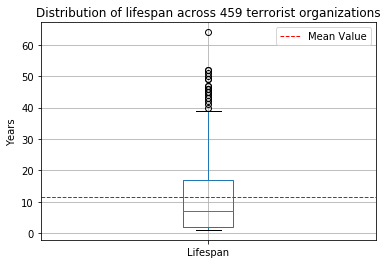

In [62]:
plt.close()
df2.boxplot(column='lifespan')
plt.axhline(y=np.mean(df2['lifespan']), linestyle='--', linewidth=1, color='r', label='Mean Value')
plt.ylabel("Years")
plt.xticks([1], ['Lifespan'])
plt.title('Distribution of lifespan across 459 terrorist organizations')
plt.legend(loc='upper right')
plt.savefig("supplementary_box_plot.png", dpi=800)
plt.show()

In [63]:
np.mean(df2['lifespan'])

11.525054466230937

In [64]:
np.percentile(df2['lifespan'], 50)

7.0

In [65]:
np.percentile(df2['lifespan'], 10)

1.0

In [66]:
np.percentile(df2['lifespan'], 90)

31.0

In [67]:
np.percentile(df2['lifespan'], 25)

2.0

In [69]:
np.percentile(df2['lifespan'], 75)

17.0